In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [ ]:
#loading data
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

Training data:


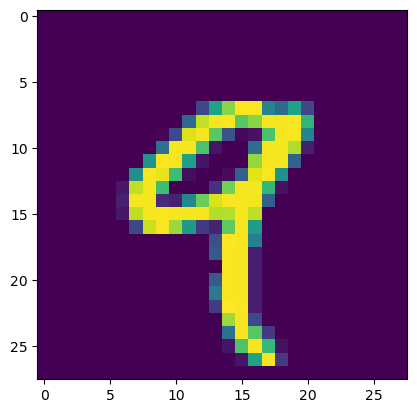

Label of this image is 9


In [ ]:
#What mnist images look like
import matplotlib.pyplot as plt
print("Training data:")
plt.imshow(train_images[4])
plt.show()
print("Label of this image is",train_labels[4])

In [ ]:
#reshaping data as needed by the model
train_images=np.reshape(train_images,(-1,28,28,1))
test_images=np.reshape(test_images,(-1,28,28,1))
train_images.shape,test_images.shape,train_labels.shape,test_labels.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000,), (10000,))

In [ ]:
#normalising
train_images=train_images/255
test_images=test_images/255

In [ ]:
#implementing one hot encoding
from keras.utils.np_utils import to_categorical
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

In [ ]:
#importing the model
from keras.models import Sequential

In [ ]:
model=Sequential()

In [ ]:
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [ ]:
#adding layers and forming the model
model.add(Conv2D(32,kernel_size=5,strides=1,padding="Same",activation="relu",input_shape=(28,28,1)))
model.add(MaxPooling2D(padding="same"))

model.add(Conv2D(64,kernel_size=5,strides=1,padding="same",activation="relu"))
model.add(MaxPooling2D(padding="same"))

model.add(Flatten())

model.add(Dense(1024,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10,activation="sigmoid"))

In [ ]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
history=model.fit(train_images,train_labels,batch_size=100,epochs=5,validation_data=(test_images,test_labels))

Epoch 1/5
600/600 [==============================] - 45s 75ms/step - loss: 0.0120 - accuracy: 0.9958 - val_loss: 0.0269 - val_accuracy: 0.9924
Epoch 2/5
600/600 [==============================] - 43s 71ms/step - loss: 0.0102 - accuracy: 0.9968 - val_loss: 0.0331 - val_accuracy: 0.9906
Epoch 3/5
600/600 [==============================] - 51s 84ms/step - loss: 0.0092 - accuracy: 0.9968 - val_loss: 0.0295 - val_accuracy: 0.9932
Epoch 4/5
600/600 [==============================] - 45s 75ms/step - loss: 0.0063 - accuracy: 0.9979 - val_loss: 0.0332 - val_accuracy: 0.9915
Epoch 5/5
600/600 [==============================] - 43s 71ms/step - loss: 0.0078 - accuracy: 0.9973 - val_loss: 0.0368 - val_accuracy: 0.9903


In [ ]:
model.evaluate(train_images,train_labels),model.evaluate(test_images,test_labels)

313/313 [==============================] - 2s 8ms/step - loss: 0.0368 - accuracy: 0.9903


([0.006996815092861652, 0.9978333115577698],
 [0.03676378354430199, 0.9902999997138977])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 1024)              3

In [ ]:
def visualize_transformations(input_image):
    for epoch in range(5):  # Assuming 5 epochs were trained
        intermediate_model = tf.keras.models.Model(inputs=model.input, outputs=[layer.output for layer in model.layers if isinstance(layer, tf.keras.layers.Conv2D)])
        layer_outputs = intermediate_model.predict(input_image)

        for layer_index, layer_output in enumerate(layer_outputs):
            num_filters = layer_output.shape[-1]
            rows = int(np.ceil(num_filters / 4))  # Dynamically determine number of rows
            plt.figure(figsize=(15, 3 * rows))  # Adjust figure size based on number of rows
            for i in range(num_filters):
                ax = plt.subplot(rows, 4, i + 1)  # Adjust subplot layout
                ax.set_xticks([])
                ax.set_yticks([])
                ax.imshow(layer_output[0, :, :, i], cmap='viridis')
            plt.suptitle(f'Epoch {epoch + 1}, Convolutional Layer {layer_index + 1}')
            plt.show()


1/1 [==============================] - 0s 99ms/step


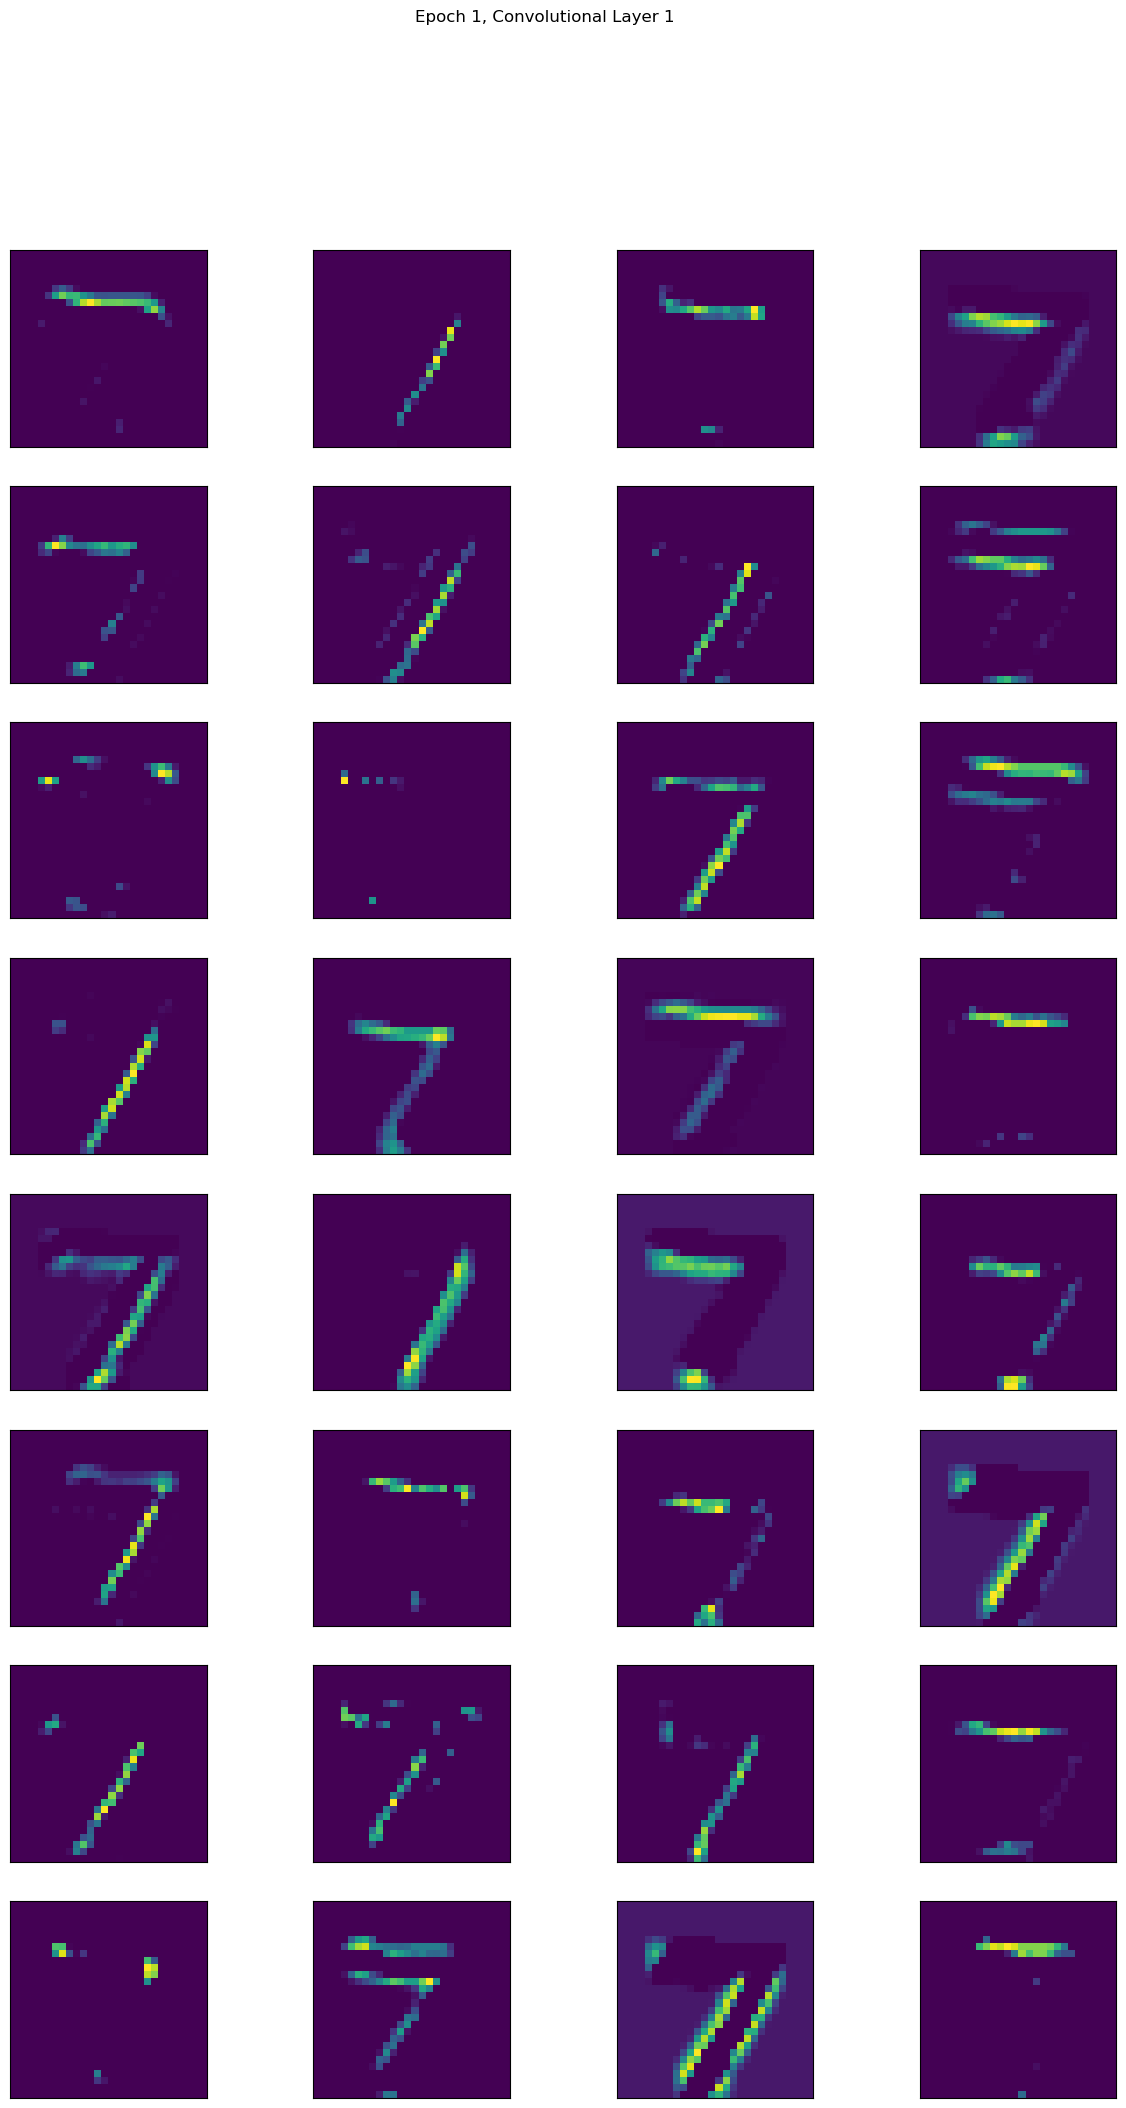

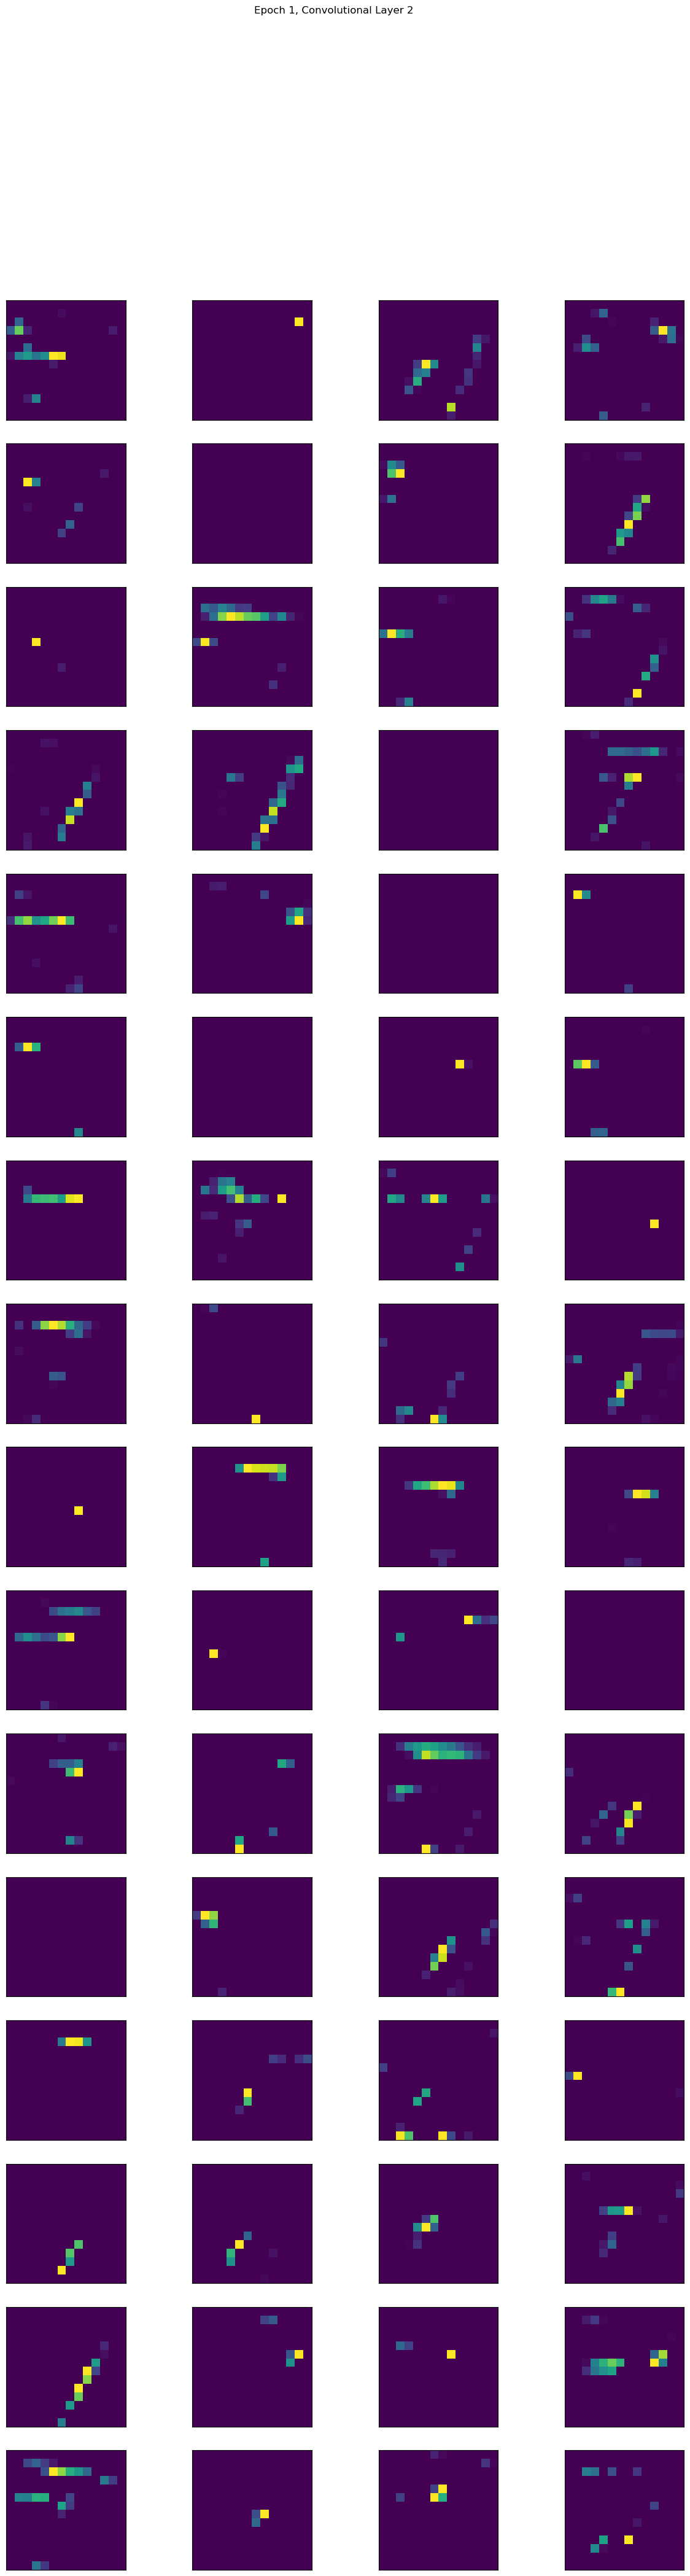

1/1 [==============================] - 0s 97ms/step


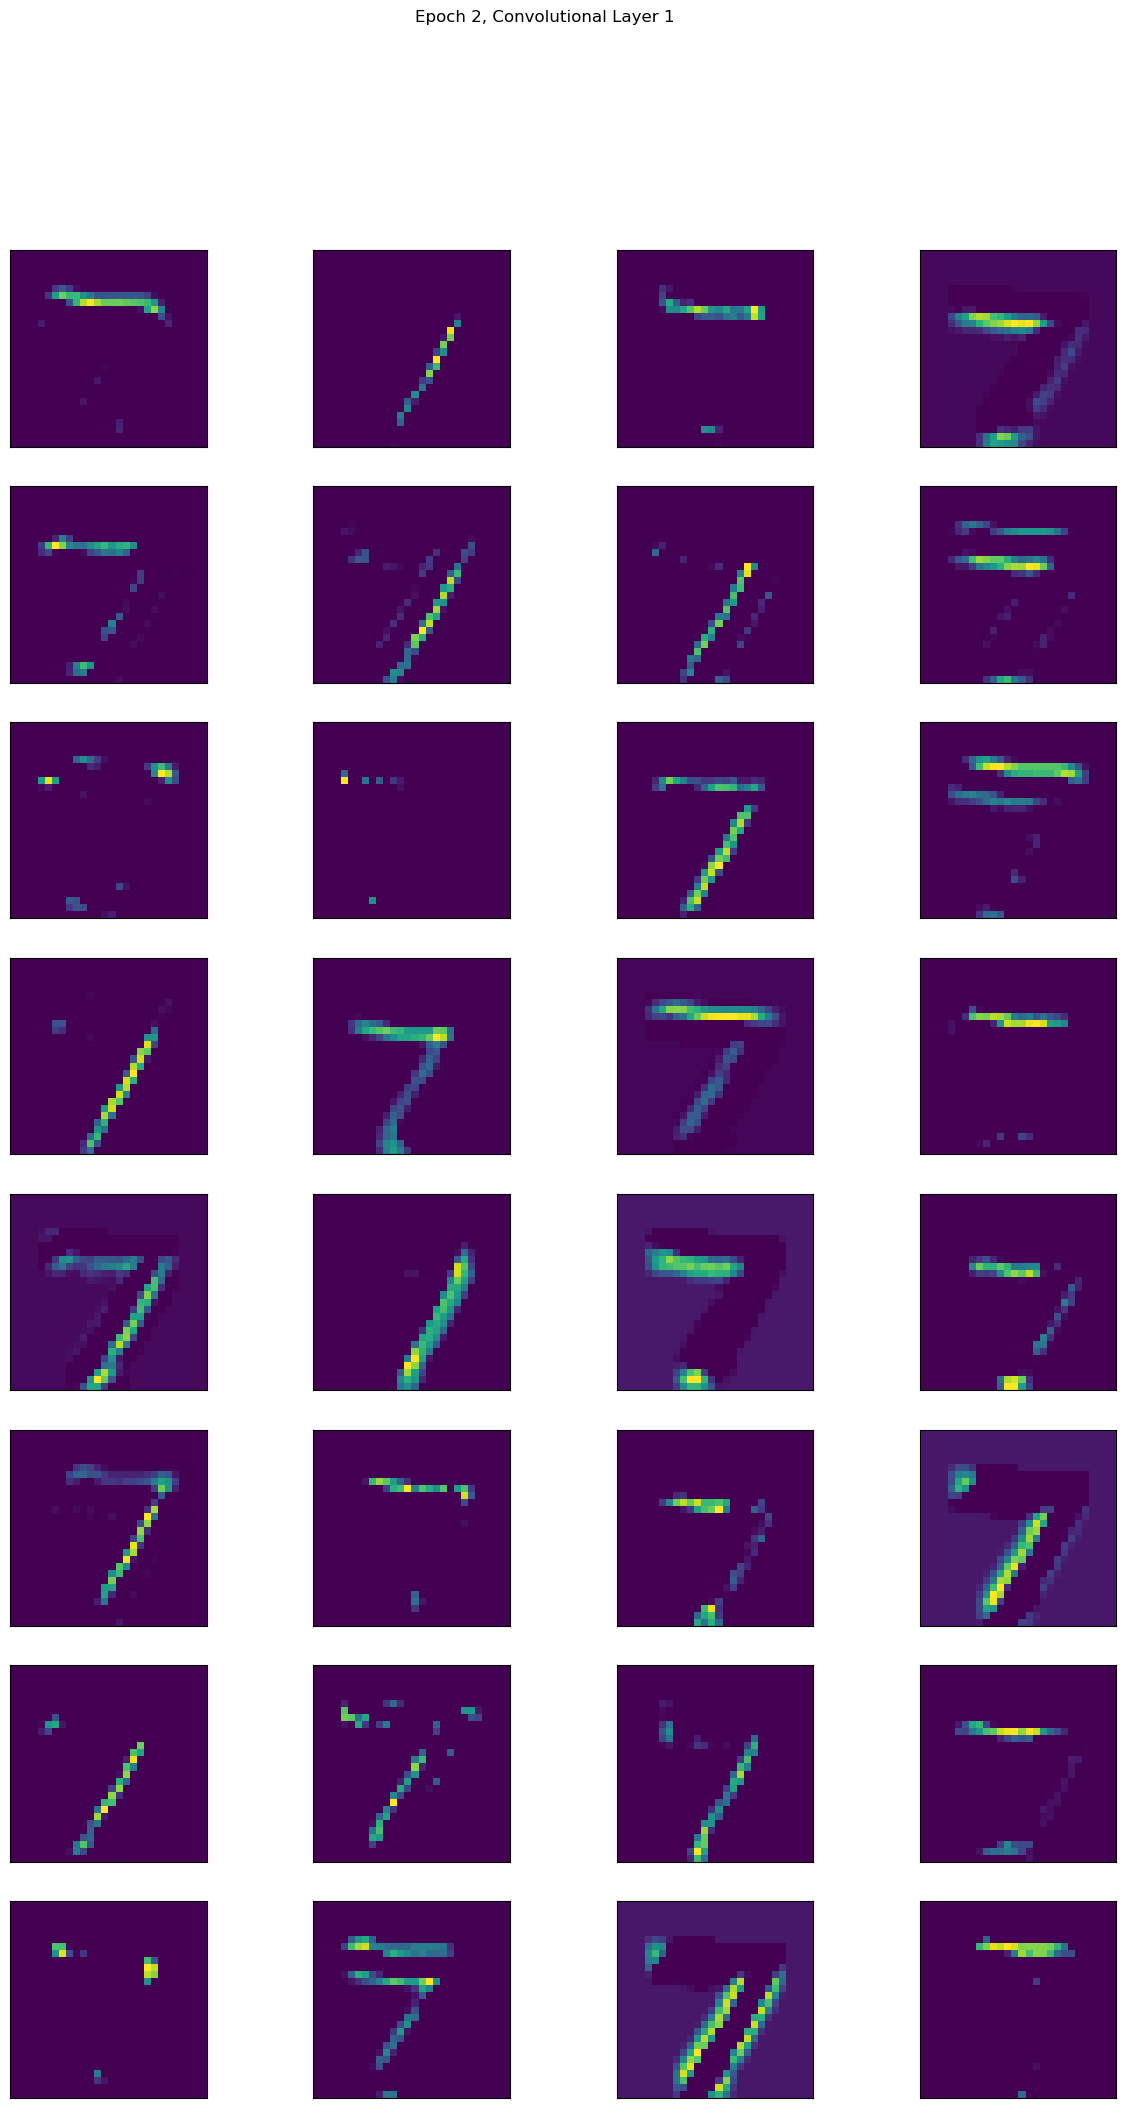

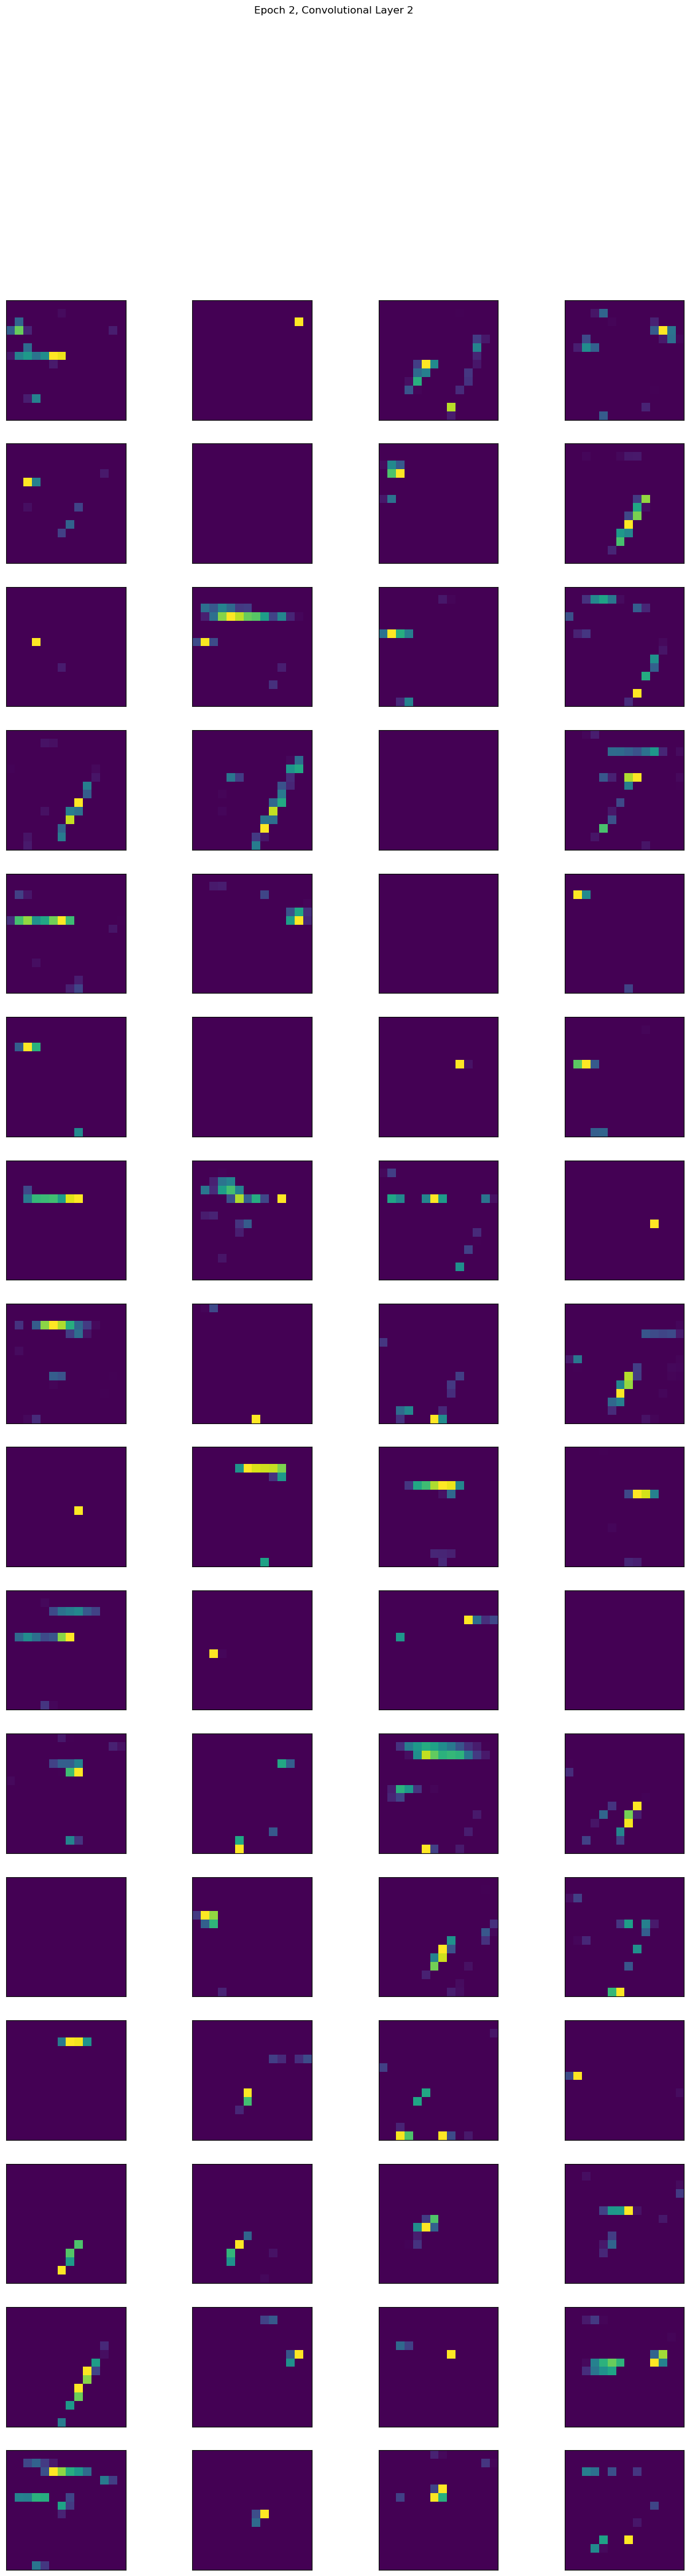

1/1 [==============================] - 0s 107ms/step


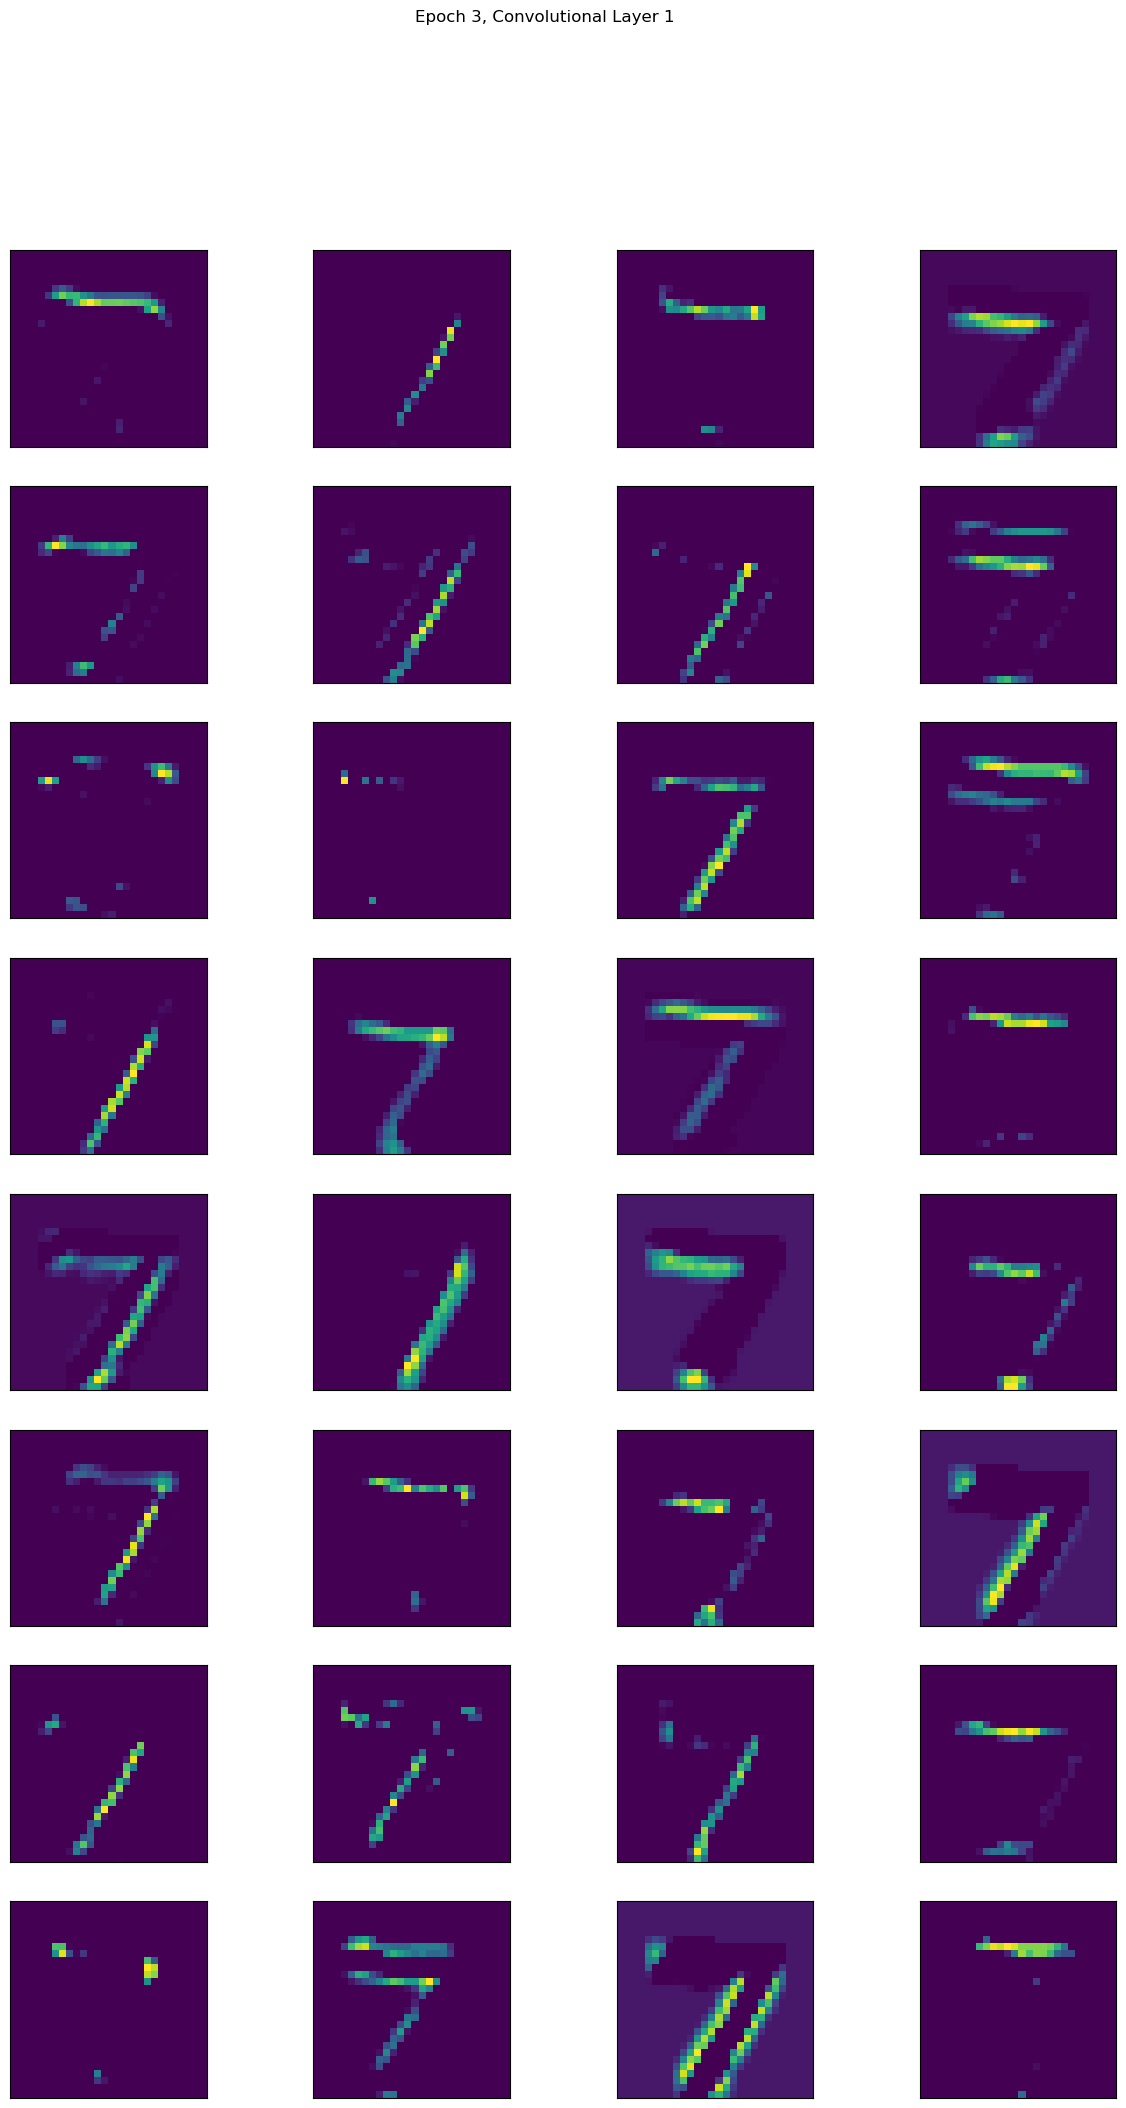

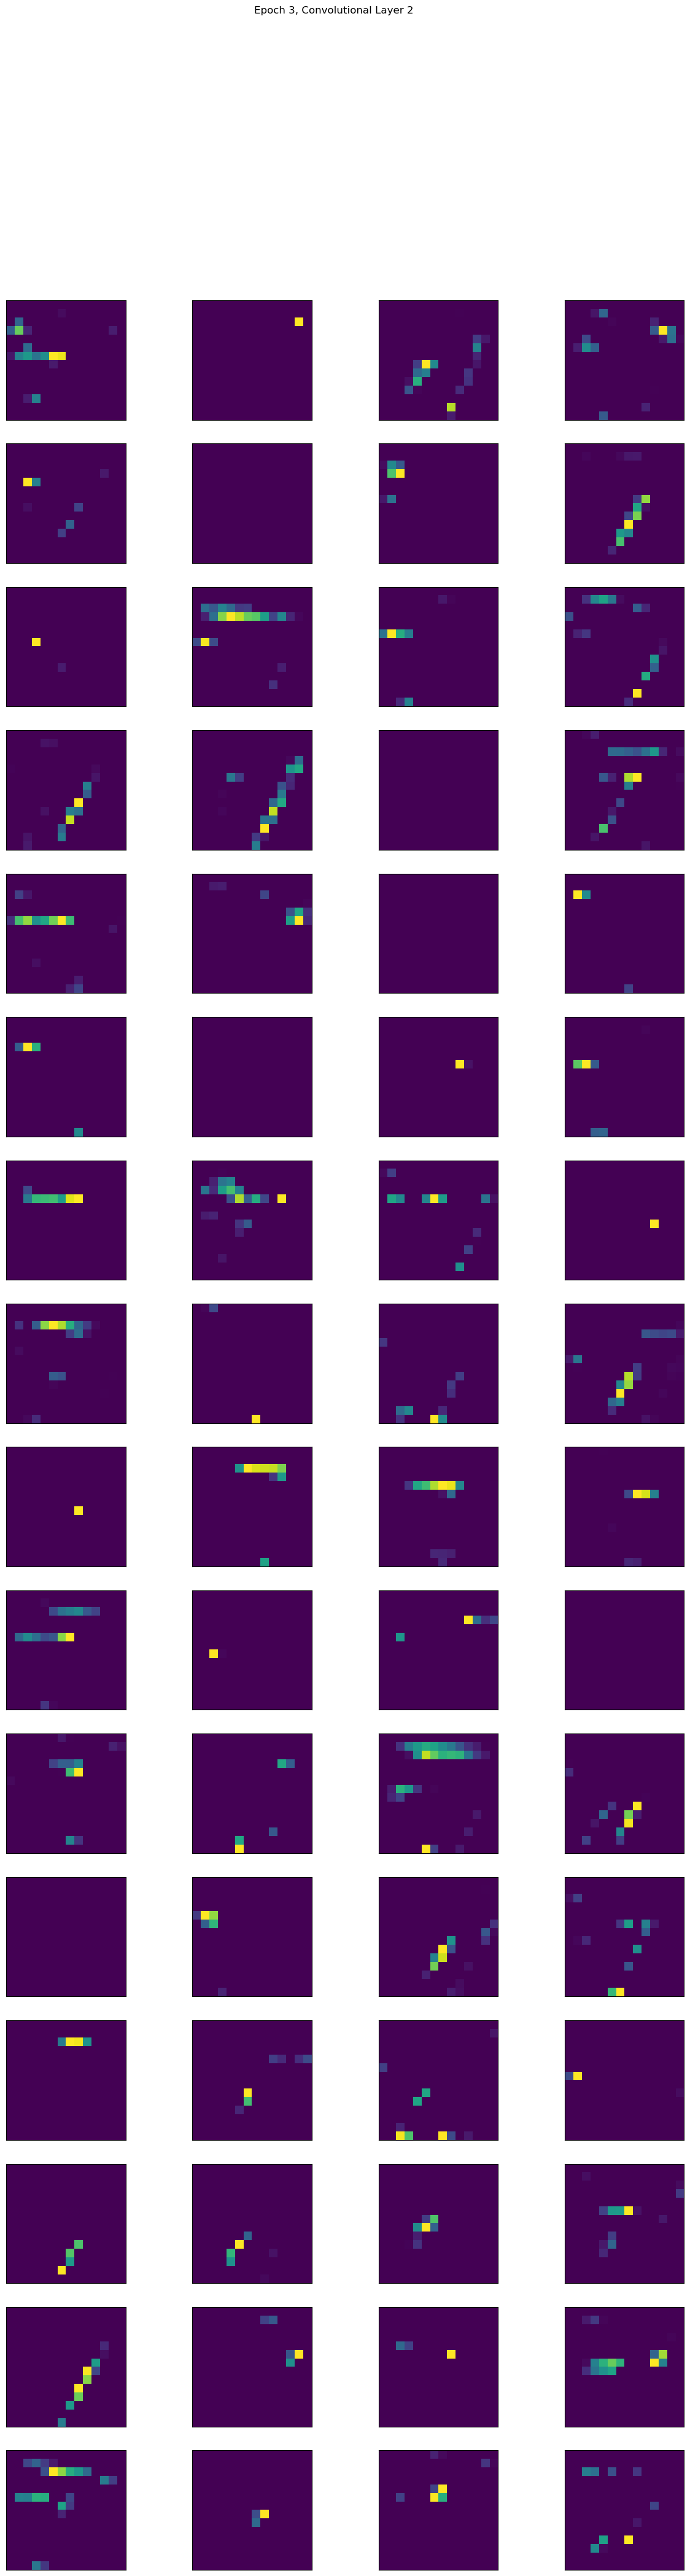

1/1 [==============================] - 0s 99ms/step


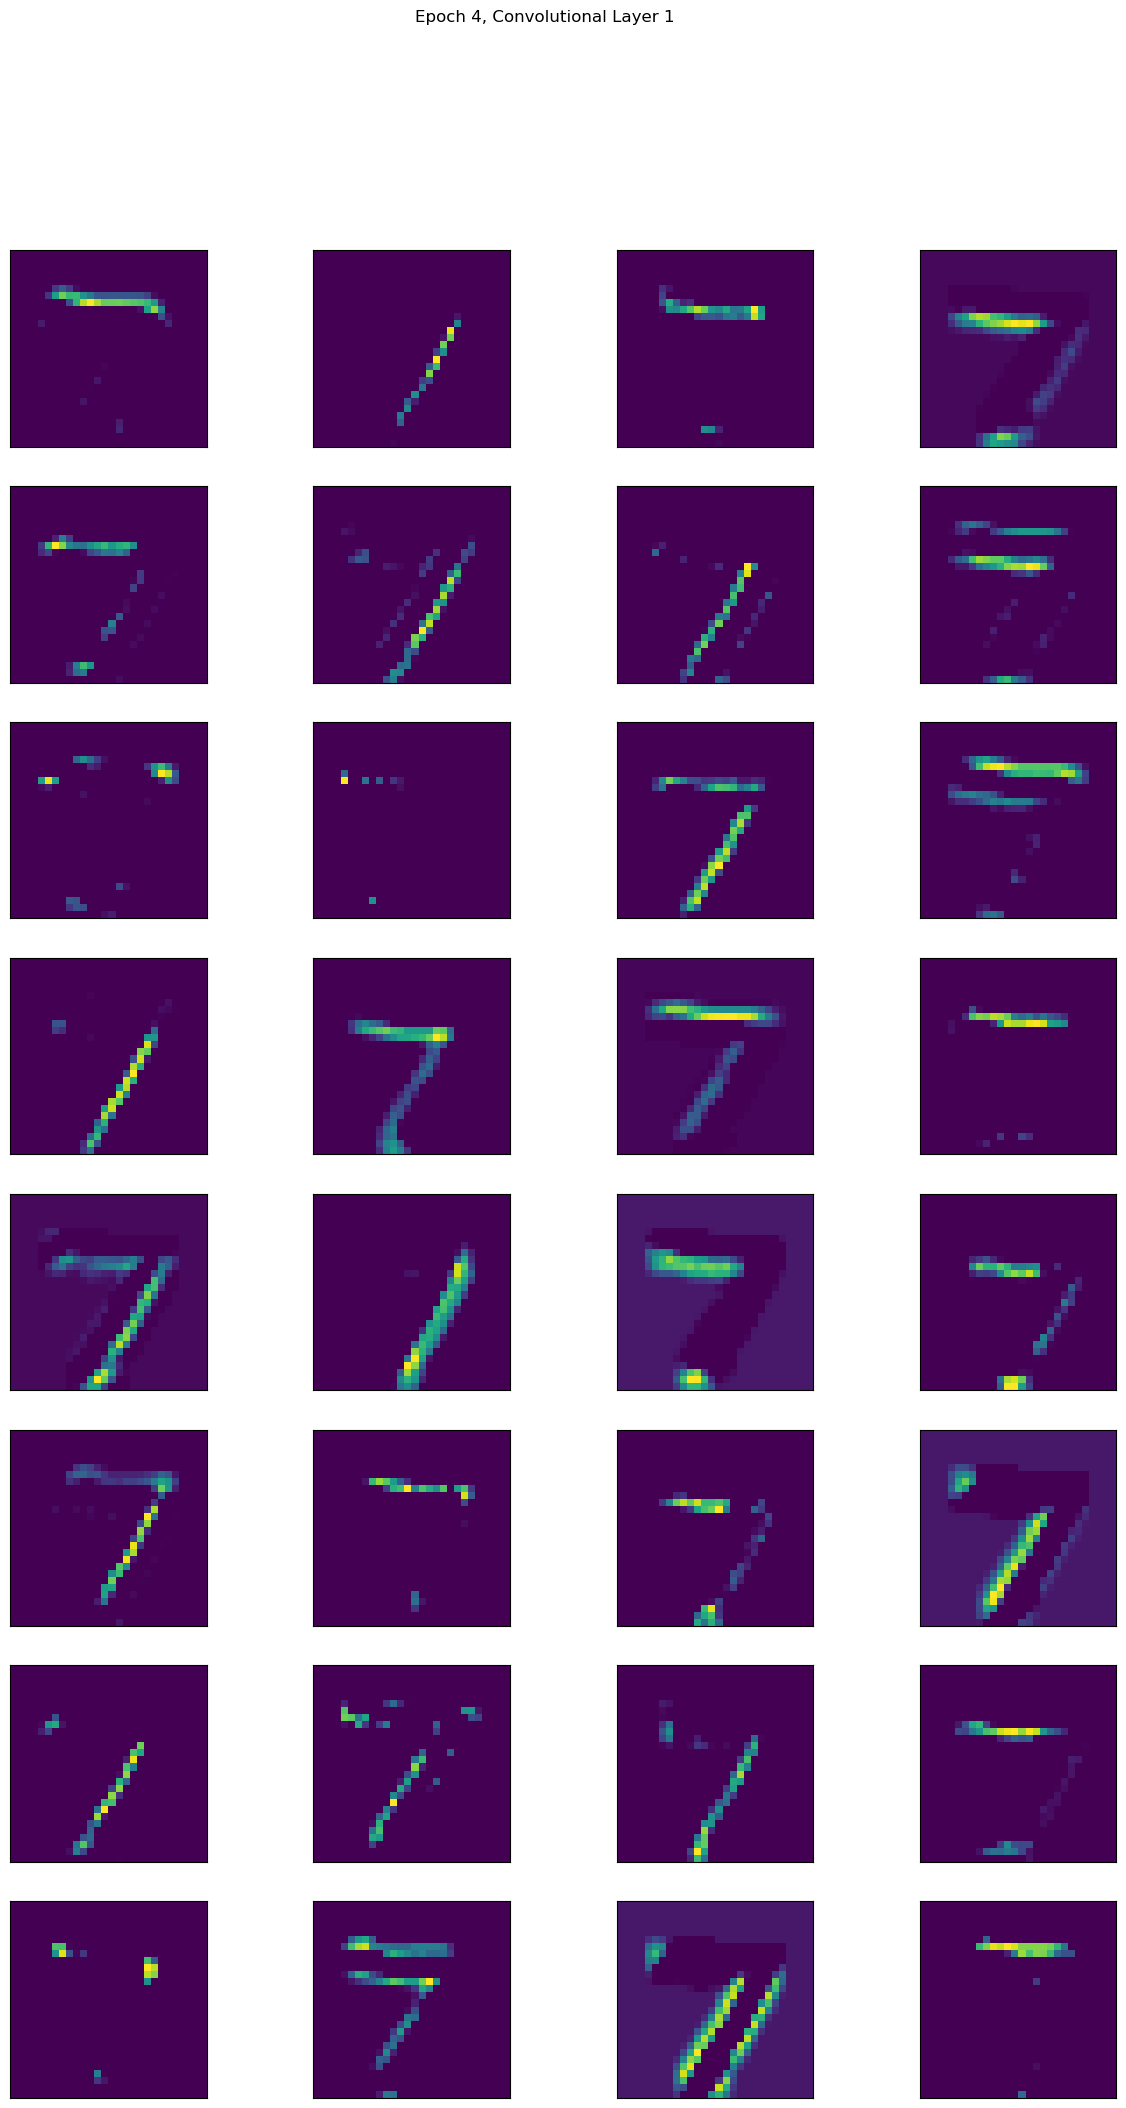

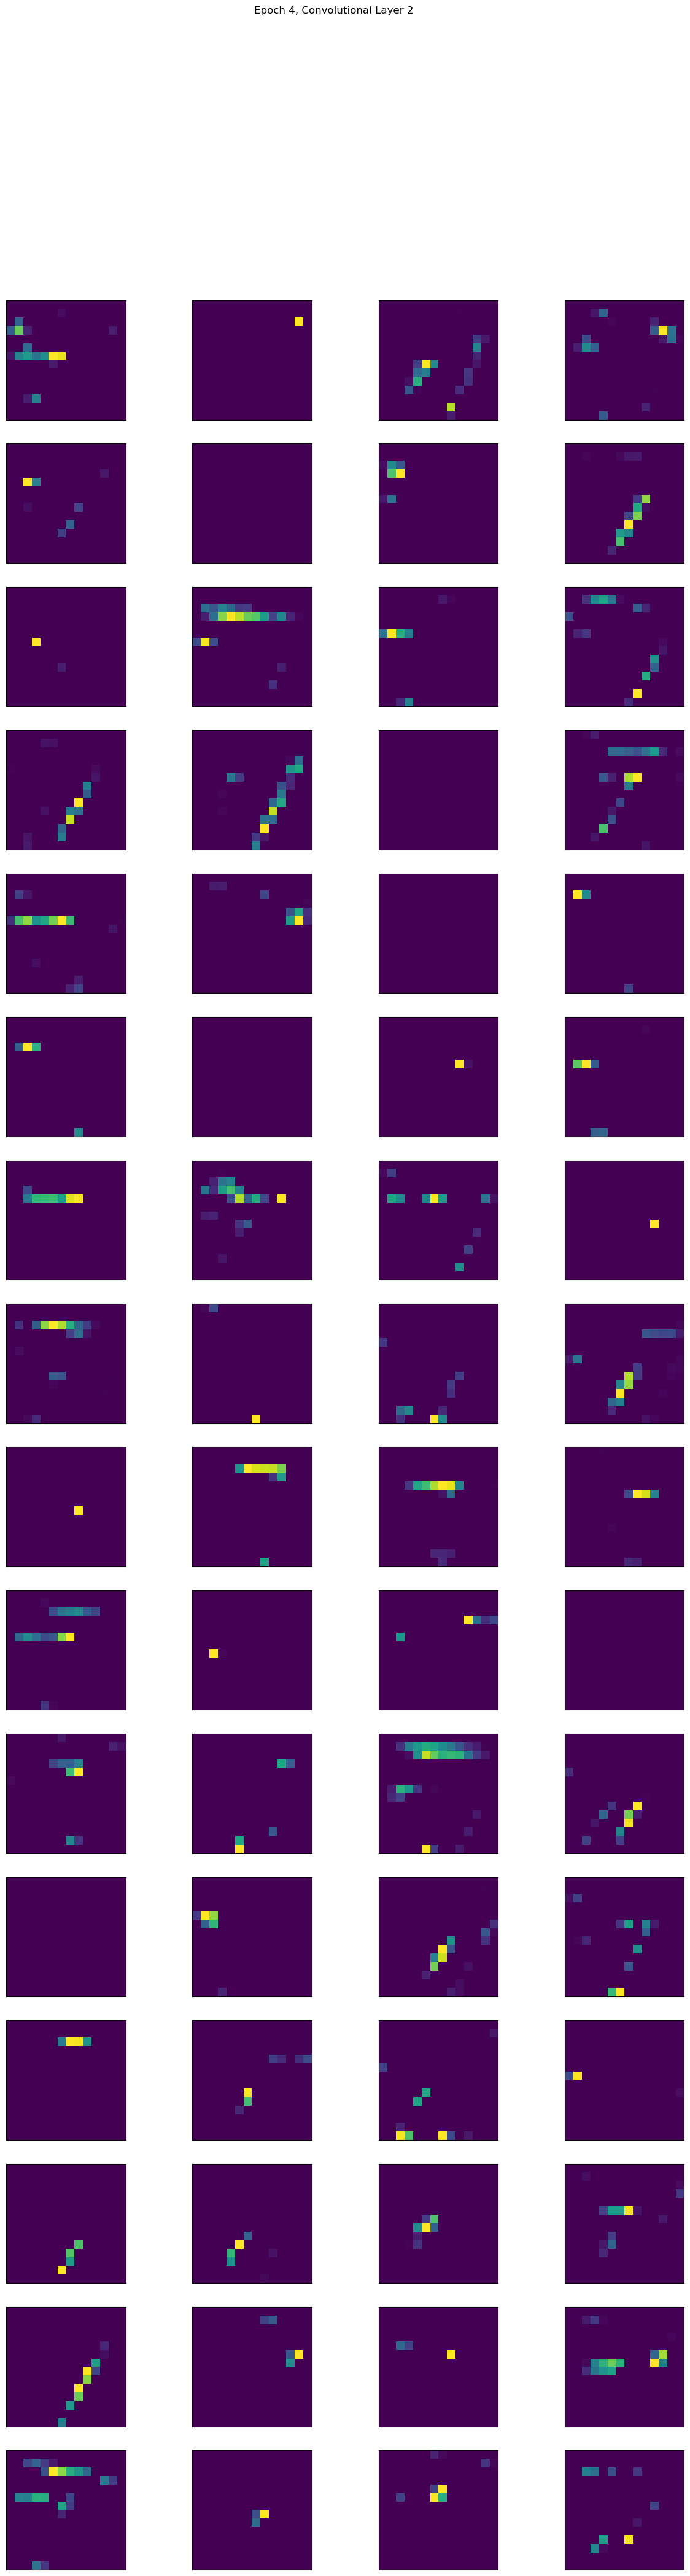

1/1 [==============================] - 0s 97ms/step


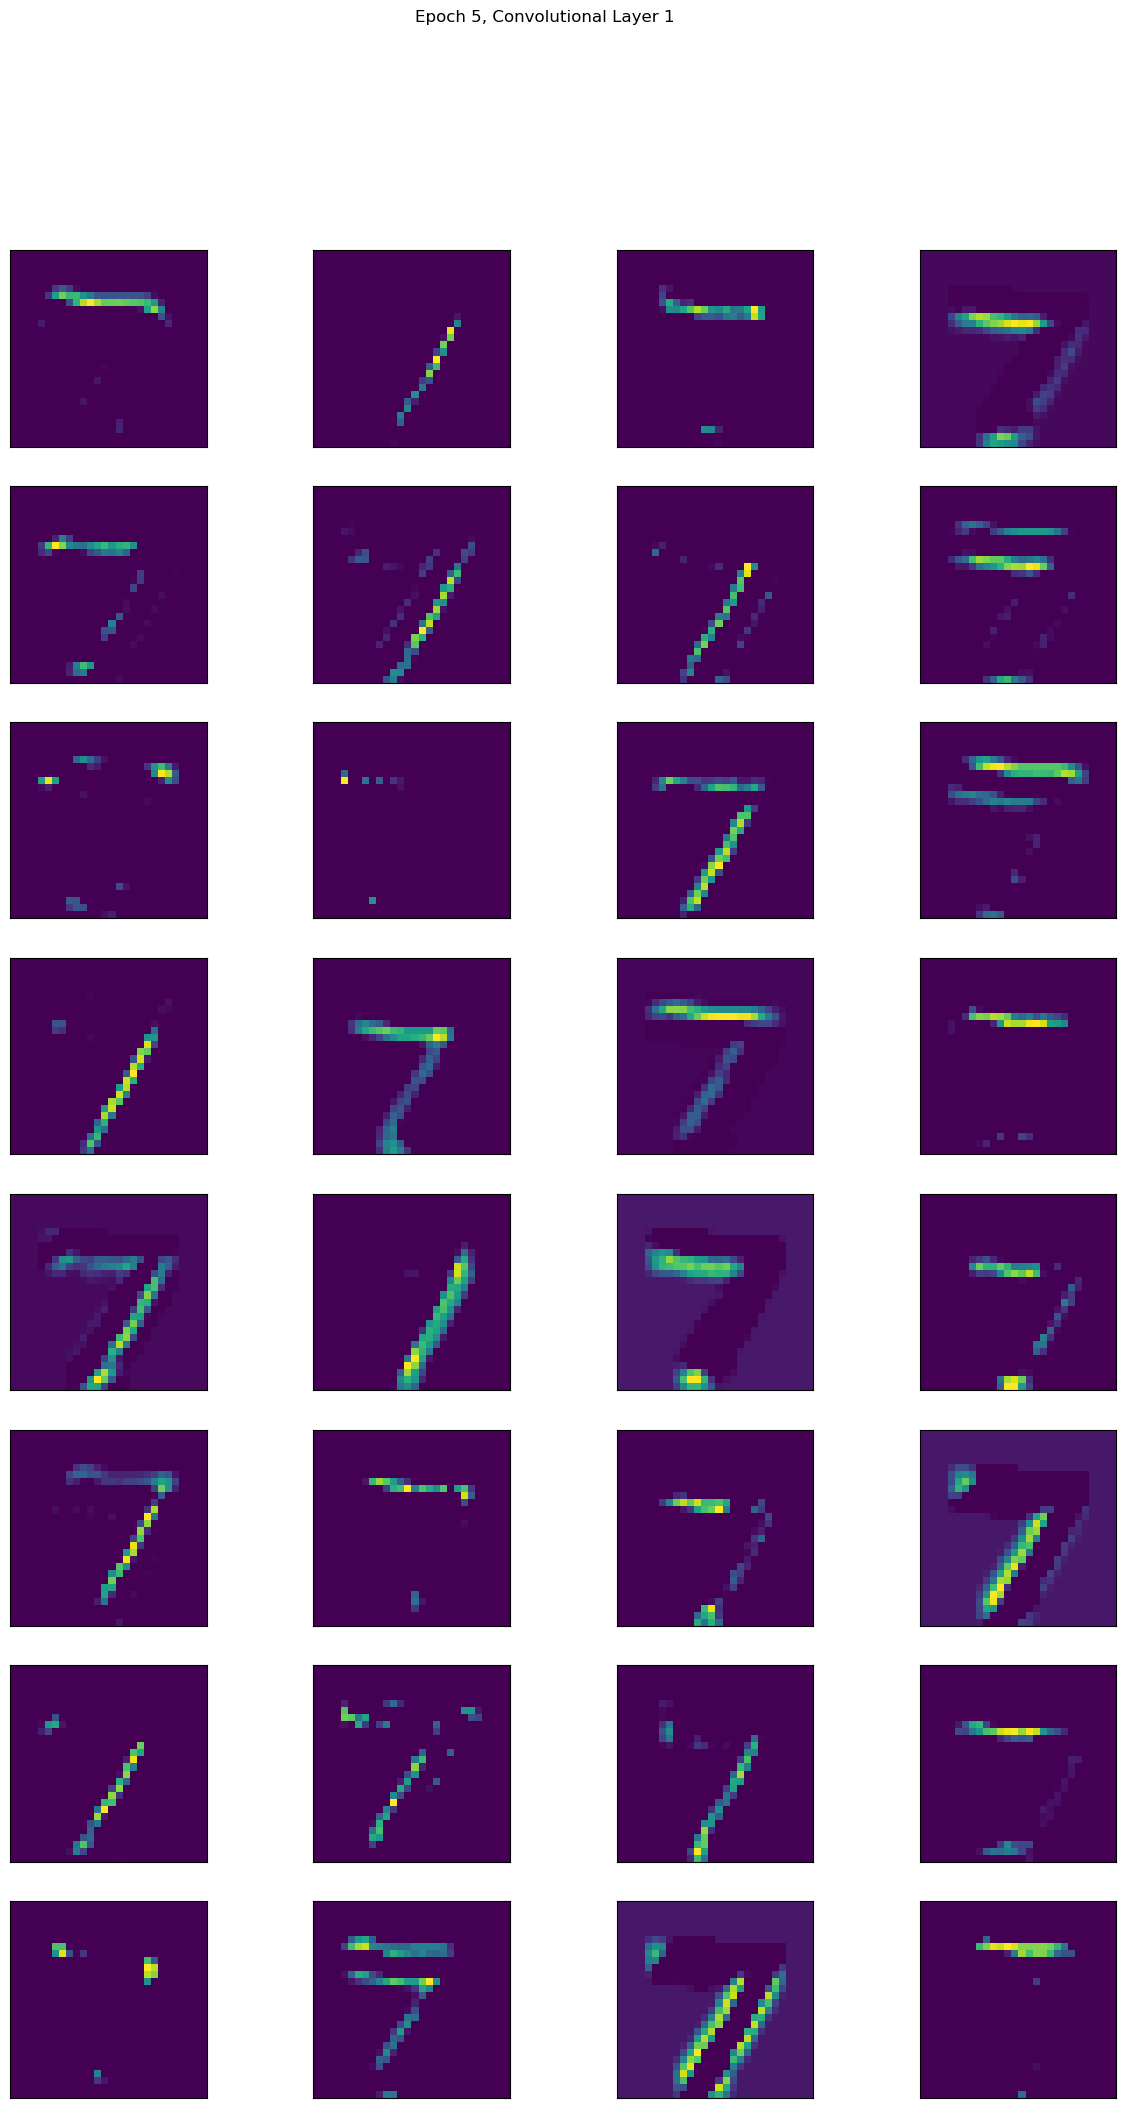

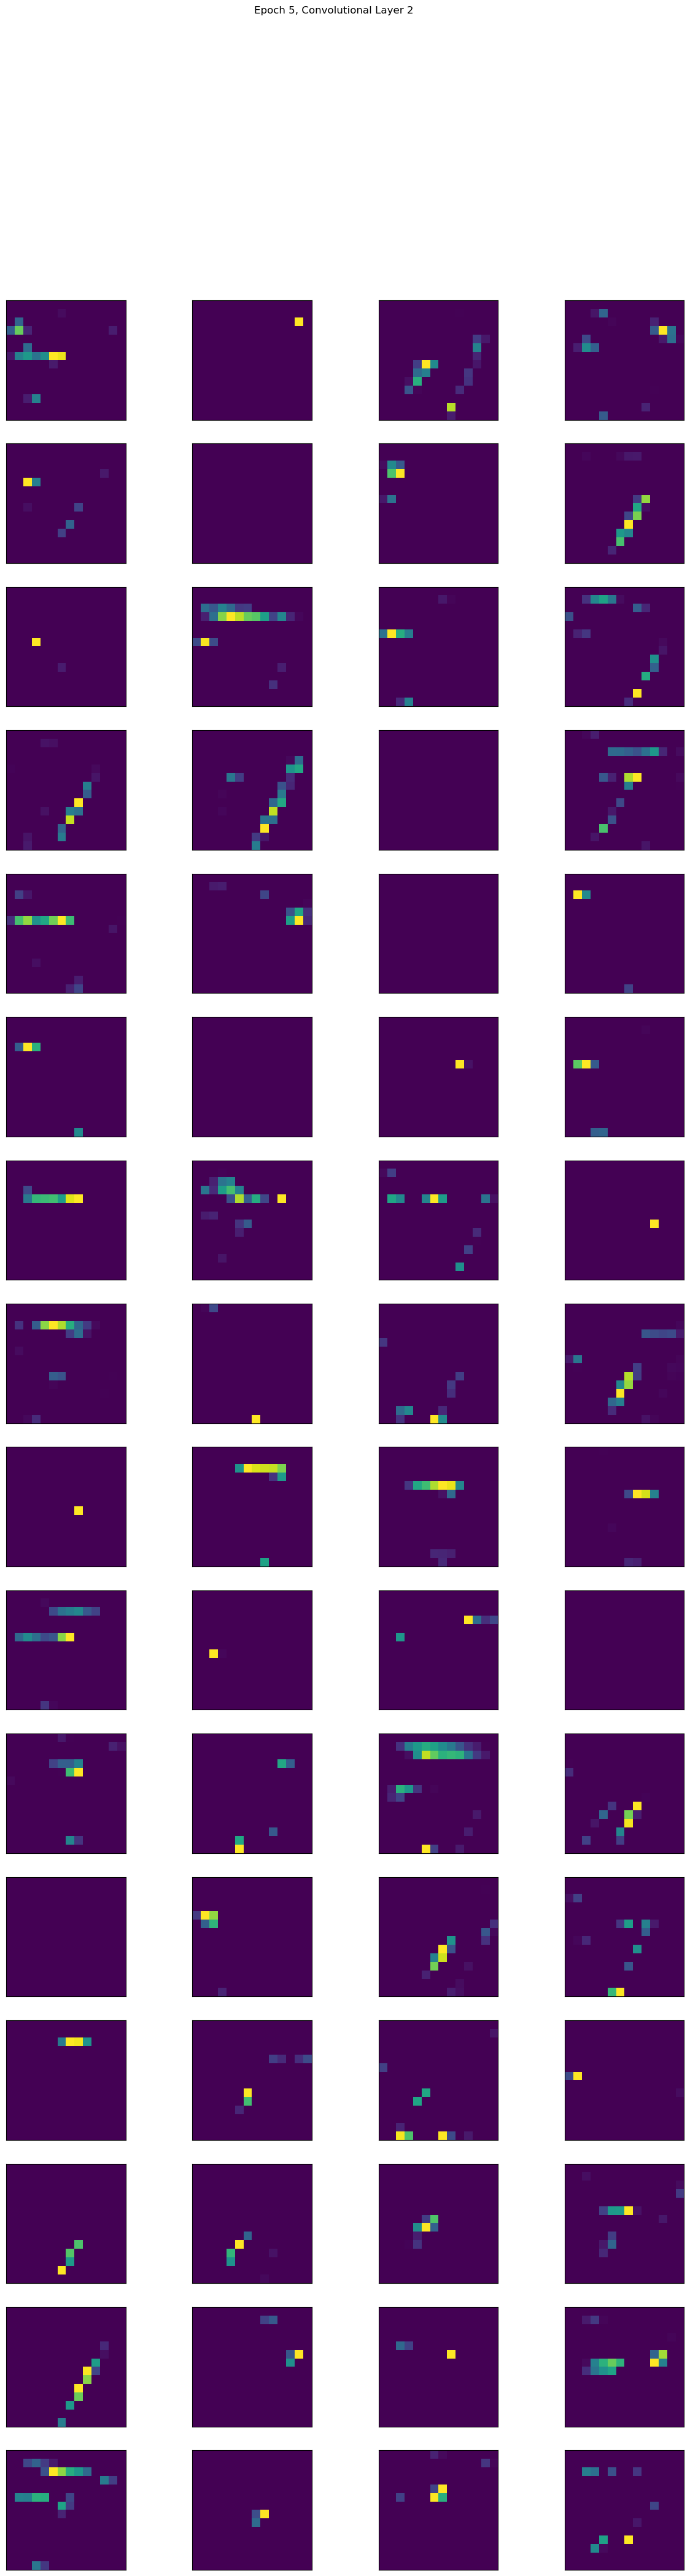

In [ ]:
input_image = np.expand_dims(test_images[0], axis=0)
visualize_transformations(input_image)

In [ ]:
def visualize_actual_transformations(input_image, opacity=0.5):
    for epoch in range(5):  # Assuming 5 epochs were trained
        intermediate_model = tf.keras.models.Model(inputs=model.input, outputs=[layer.output for layer in model.layers if isinstance(layer, tf.keras.layers.Conv2D)])
        layer_outputs = intermediate_model.predict(input_image)

        # Overlay activation maps onto the input image
        overlay_image = np.copy(input_image)
        for layer_index, layer_output in enumerate(layer_outputs):
            num_filters = layer_output.shape[-1]
            for filter_index in range(num_filters):
                # Scale the activation map to [0, 1] range
                activation_map = layer_output[0, :, :, filter_index]
                max_value = activation_map.max()
                if max_value != 0:  # Check if max value is not zero to avoid division by zero
                    activation_map /= max_value

                # Expand dimensions for resizing
                activation_map_expanded = np.expand_dims(activation_map, axis=-1)

                # Resize the activation map to match the input image size
                resized_activation_map = tf.image.resize(activation_map_expanded, input_image.shape[1:3])

                # Overlay the activation map onto the input image with reduced opacity
                overlay_image[0] = (1 - opacity) * overlay_image[0] + opacity * resized_activation_map.numpy()

        # Clip values to ensure they are within valid range for display
        overlay_image = np.clip(overlay_image, 0.0, 1.0)

        # Display the overlay image
        plt.figure(figsize=(8, 8))
        plt.imshow(overlay_image[0], cmap='viridis')
        plt.axis('off')
        plt.title(f'Overlay Activation Maps - Epoch {epoch + 1}')
        plt.show()

1/1 [==============================] - 0s 104ms/step


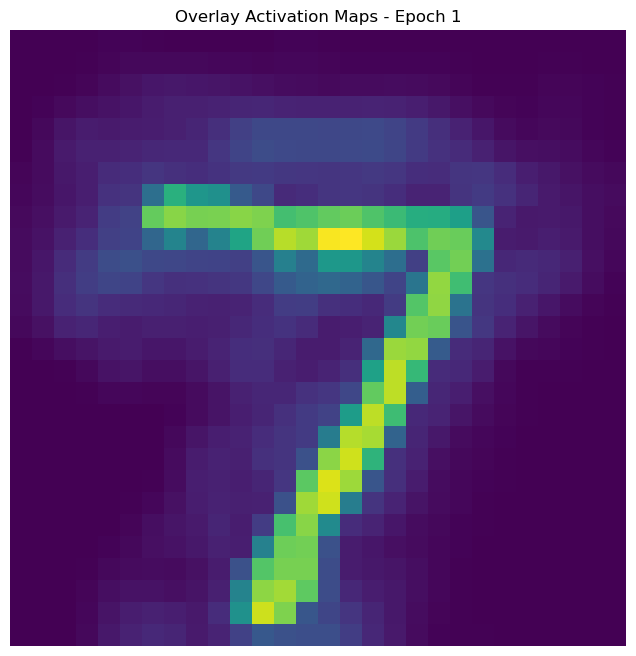

1/1 [==============================] - 0s 59ms/step


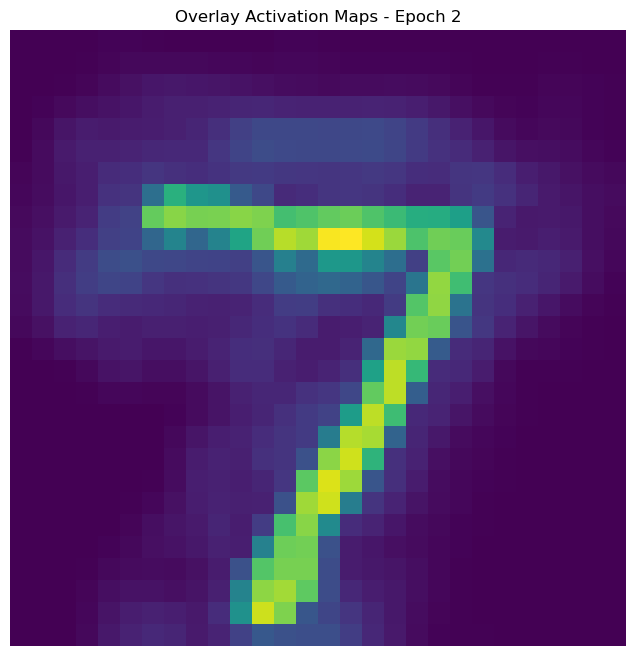

1/1 [==============================] - 0s 62ms/step


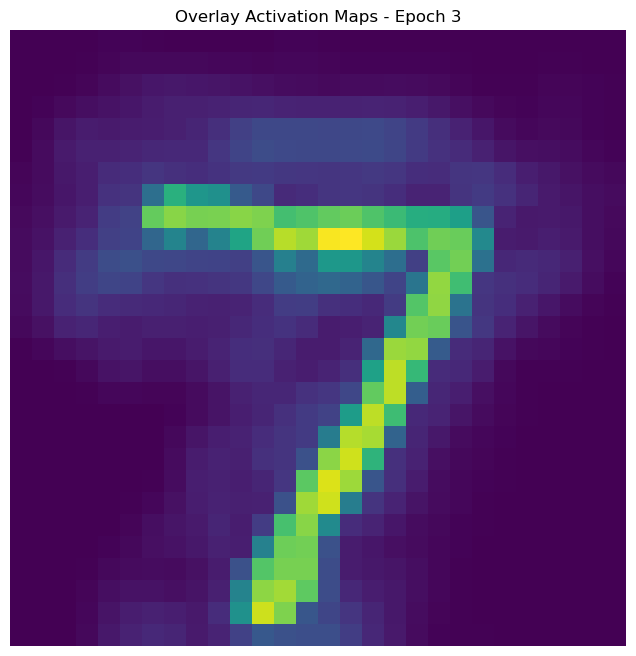

1/1 [==============================] - 0s 56ms/step


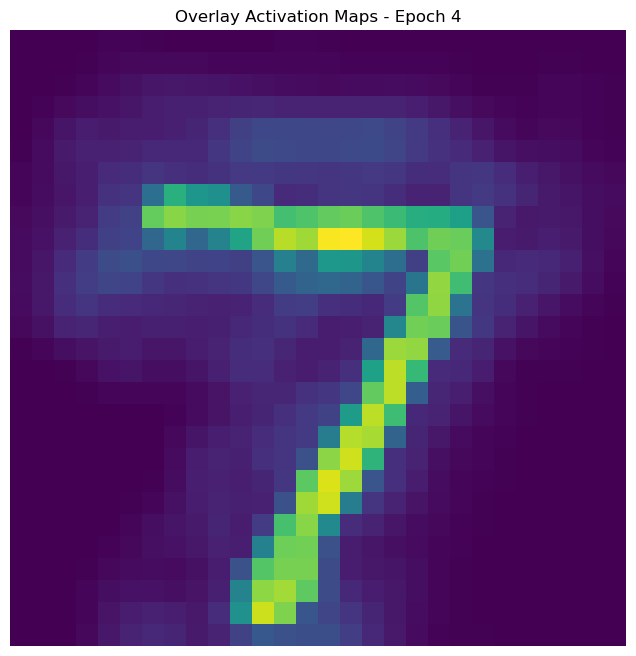

1/1 [==============================] - 0s 70ms/step


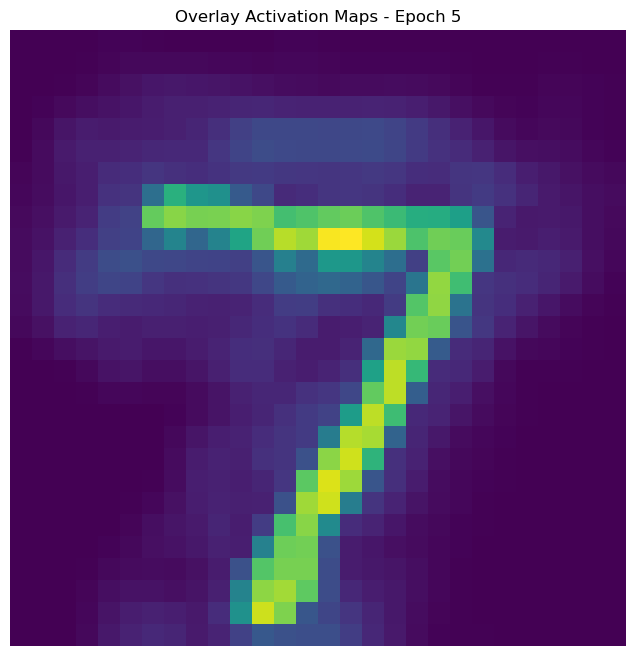

In [ ]:
input_image = np.expand_dims(test_images[0], axis=0)
visualize_actual_transformations(input_image, opacity=0.02)

In [ ]:
def deepdream(input_image, model, layer_name, num_iterations=20, step_size=0.01, max_loss=10):
    # Convert the input image to a TensorFlow tensor
    input_image = tf.convert_to_tensor(input_image)

    # Define the model up to a certain layer
    dream_model = tf.keras.Model(inputs=model.input, outputs=model.get_layer(layer_name).output)

    # Define the loss function to maximize the activation of the chosen layer
    def compute_loss(input_image):
        activation = dream_model(input_image)
        return tf.reduce_mean(activation)

    # Use gradient ascent to maximize the loss
    for i in range(num_iterations):
        with tf.GradientTape() as tape:
            tape.watch(input_image)
            loss = compute_loss(input_image)

        # Compute gradients of the loss with respect to the input image
        gradients = tape.gradient(loss, input_image)

        # Normalize gradients
        gradients /= tf.math.reduce_std(gradients) + 1e-8

        # Update the input image using the gradients and a step size
        input_image += gradients * step_size

        # Clip the pixel values to maintain image validity
        input_image = tf.clip_by_value(input_image, -1, 1)

        # Check if the loss is within the specified range
        if loss > max_loss:
            break

    return input_image

In [ ]:
def visualize_deepdream(input_image, model, layer_name, num_iterations=20, step_size=0.01, max_loss=10):
    # Run DeepDream to generate the dream image
    dream_image = deepdream(input_image, model, layer_name, num_iterations, step_size, max_loss)

    # Display the dream image
    plt.imshow(np.squeeze(dream_image))
    plt.axis('off')
    plt.show()

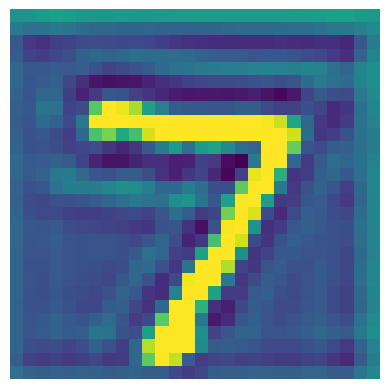

In [ ]:
input_image = np.expand_dims(test_images[0], axis=0)
visualize_deepdream(input_image, model, 'conv2d', num_iterations=10, step_size=0.03, max_loss=20)

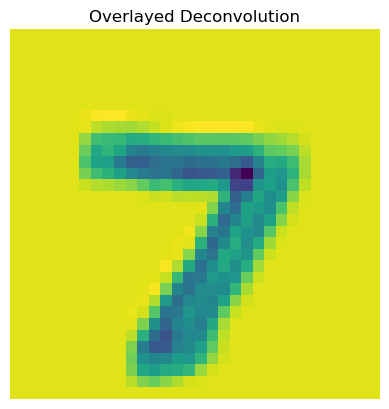

In [ ]:


def overlay_deconvolution(model, layer_name, input_image):
    # Get the layer output and weights
    layer_output = model.get_layer(layer_name).output
    layer_weights = model.get_layer(layer_name).get_weights()[0]

    # Transpose the weights to match deconvolution
    transposed_weights = np.transpose(layer_weights, (0, 1, 3, 2))

    # Compute deconvolution for each feature map
    deconvolved_feature_maps = []
    for i in range(layer_weights.shape[3]):
        # Create a deconvolutional model for the specified layer
        deconv_model = tf.keras.models.Sequential()
        deconv_model.add(tf.keras.layers.Conv2DTranspose(1, kernel_size=layer_weights.shape[0],
                                                         strides=(1, 1), padding='valid', use_bias=False,
                                                         input_shape=(None, None, layer_weights.shape[2])))
        deconv_model.set_weights([transposed_weights[:, :, i:i+1, :]])

        # Compute deconvolution for the i-th feature map
        deconvolved_map = deconv_model(np.expand_dims(input_image, axis=-1))
        deconvolved_feature_maps.append(deconvolved_map[0])

    # Overlay all deconvolved feature maps on top of each other
    overlayed_image = np.sum(deconvolved_feature_maps, axis=0)

    return overlayed_image / layer_weights.shape[3]  # Normalize by the number of feature maps

# Example usage:
# Assuming model is your trained TensorFlow model
# Assuming input_image is your input data for visualization
input_image = np.expand_dims(test_images[0], axis=0)
overlayed_deconvolution = overlay_deconvolution(model, 'conv2d', input_image)

# Display the overlayed deconvolution
plt.imshow(overlayed_deconvolution.squeeze(), cmap='viridis')  # Squeeze to remove the channel dimension
plt.axis('off')
plt.title('Overlayed Deconvolution')
plt.show()
